# __BANKA KAMPANYASINA KATILIM TAHMİNİ__

## _KEŞİFSEL VERİ ANALİZİ & SINIFLANDIRMA_

### 1. Giriş

Bankacılık sektöründeki pazarlama harcamaları oldukça büyüktür ve pazarlama stratejilerini oldukça iyi optimize etmeleri gerekmektedir. Müşterilerin ihtiyaçlarını anlamlandırarak ve daha etkili pazarlama planları ile daha fazla müşteriye ulaşabilirler. Banka, müşteri veri tabanında yer alan demografi sayesinde, müşterilerin pazarlama kampanyasına verdiği yanıtı öngörmesine ve gelecekteki pazarlama planları için hedef bir müşteri profili oluşturmasını sağlayacaktır.

Banka, telefon pazarlamasıyla ulaştığı kitleyi daha iyi anlayarak, geri dönüşleri yukarı taşıyabilir. __Banka, demografi ve işlem geçmişi gibi müşteri özelliklerini analiz ederek, müşterinin davranışlarını tahmin edebilecek ve hangi tür müşterilerin vadeli mevduat alma olasılığının daha yüksek olduğunu belirleyebilecektir.__ Banka daha sonraki pazarlama çalışmalarını bu müşterilere odaklanabilir. Bu çalışma, bankanın sadece mevduatları daha etkin bir şekilde güvence altına almasını sağlamakla kalmayacak, aynı zamanda belirli müşteriler için istenmeyen reklamları azaltarak müşteri memnuniyetini artıracaktır.

Veriler, UCI Machine Learning deposundan alınmıştır ve Portekizli bir bankanın doğrudan pazarlama kampanyası ile ilgilidir. Veri setinde, müşterilerin eğitim düzeyi, sosyal durumu, önceki kampanya sonuçları ve bazı ekonomik öznitelikerini içeren 41188 örnek ve 20 değişken vardır. Hedef değişkeni olan 'y', pazarlama kampanyasının sonucunu belirtir; müşterinin vadeli mevduat alıp almadığını (yes/no) göstermektedir. 


> ##### bank client data:
> - age
> - job: type of job
> - marital: marital status
> - education
> - default: has credit in default?
> - housing: has housing loan?
> - loan: has personal loan?
> 
> ##### related with the last contact of the current campaign:
> - contact: contact communication type
> - month: last contact month of year
> - day_of_week: last contact day of the week
> - duration: last contact duration, in seconds
> 
> ##### other attributes:
> - campaign: number of contacts performed during this campaign and for this client (includes last contact)
> - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
> - previous: number of contacts performed before this campaign and for this client
> - poutcome: outcome of the previous marketing campaign
> 
> ##### social and economic context attributes
> - emp.var.rate: employment variation rate - quarterly indicator
> - cons.price.idx: consumer price index - monthly indicator
> - cons.conf.idx: consumer confidence index - monthly indicator
> - euribor3m: euribor 3 month rate - daily indicator
> - nr.employed: number of employees - quarterly indicator
> 
> ##### output variable:
> - y: has the client subscribed a term deposit?

### 2. Veri Derlenmesi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 999)
pd.set_option("display.float_format", "{:.3f}".format)
sns.set()

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [3]:
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no


### 3. Veri Keşfi

In [4]:
def dfDescribe(df):
    pd.set_option("display.float_format", "{:.3f}".format)
    dfDesc = df.describe().T.iloc[:, [0,1,2,3,7]]
    dfNull = pd.DataFrame(df.isnull().sum(), columns=['null'])
    dfType = pd.DataFrame(df.dtypes, columns=['dtype'])
    dfInfo = pd.concat([dfDesc, dfNull, dfType], ignore_index=False, axis=1)
    dfInfo.loc[:,'zero_'] = [(df[df[col] == 0][col].count() / len(df[col])) for col in dfInfo.index]
    dfInfo.loc[:,'nunique'] = [(df[col].nunique()) for col in dfInfo.index]
    dfInfo.loc[:,'freq'] = [(df[col].value_counts().sort_values(ascending=False).values[0]) for col in dfInfo.index]
    dfInfo.loc[:,'top'] = [(df[col].value_counts().sort_values(ascending=False).index[0]) for col in dfInfo.index]

    for col in dfInfo.index:
        if dfInfo.loc[col, 'dtype'] != str('object'):
            Q1=df[col].quantile(q=0.25)
            Q3=df[col].quantile(q=0.75)
            lowOutliers=Q1-1.5*(Q3-Q1)
            upperOutliers=Q3+1.5*(Q3-Q1)
            dfInfo.loc[col, 'upout_'] = (df[df[col]>upperOutliers][col].count()*100/len(df))
            dfInfo.loc[col, 'lowout_'] = (df[df[col]<lowOutliers][col].count()*100/len(df))
            #dfInf.style.format({'count': "{:.0f}",'upOut': "{:.0f}",'lowOut': "{:.0f}"})

    return dfInfo

In [5]:
dfDescribe(df)

,count,mean,std,min,max,null,dtype,zero_,nunique,freq,top,upout_,lowout_
age,41188.000,40.024,10.421,17.000,98.000,0,int64,0.000,78,1947,31,1.139,0.000
duration,41188.000,258.285,259.279,0.000,4918.000,0,int64,0.000,1544,170,85,7.194,0.000
campaign,41188.000,2.568,2.770,1.000,56.000,0,int64,0.000,42,17642,1,5.842,0.000
pdays,41188.000,962.475,186.911,0.000,999.000,0,int64,0.000,27,39673,999,0.000,3.678
previous,41188.000,0.173,0.495,0.000,7.000,0,int64,0.863,8,35563,0,13.657,0.000
emp.var.rate,41188.000,0.082,1.571,-3.400,1.400,0,float64,0.000,10,16234,1.400,0.000,0.000
cons.price.idx,41188.000,93.576,0.579,92.201,94.767,0,float64,0.000,26,7763,93.994,0.000,0.000
cons.conf.idx,41188.000,-40.503,4.628,-50.800,-26.900,0,float64,0.000,26,7763,-36.400,1.085,0.000
euribor3m,41188.000,3.621,1.734,0.634,5.045,0,float64,0.000,316,2868,4.857,0.000,0.000
nr.employed,41188.000,5167.036,72.252,4963.600,5228.100,0,float64,0.000,11,16234,5228.100,0.000,0.000


In [6]:
for col in df.columns:
    if (df[col].dtype == np.int64 or object) and (len(df[col].unique()) <= 100):
        print(f"{col} : {df[col].unique()}")
        print(70*"-")

age : [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
----------------------------------------------------------------------
job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
----------------------------------------------------------------------
marital : ['married' 'single' 'divorced' 'unknown']
----------------------------------------------------------------------
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
----------------------------------------------------------------------
default : ['no' 'unknown' 'yes']
----------------------------------------------------------------------
housing : ['no' 'yes' 'unknown']

#### 3.1.  Müşteri Verileri

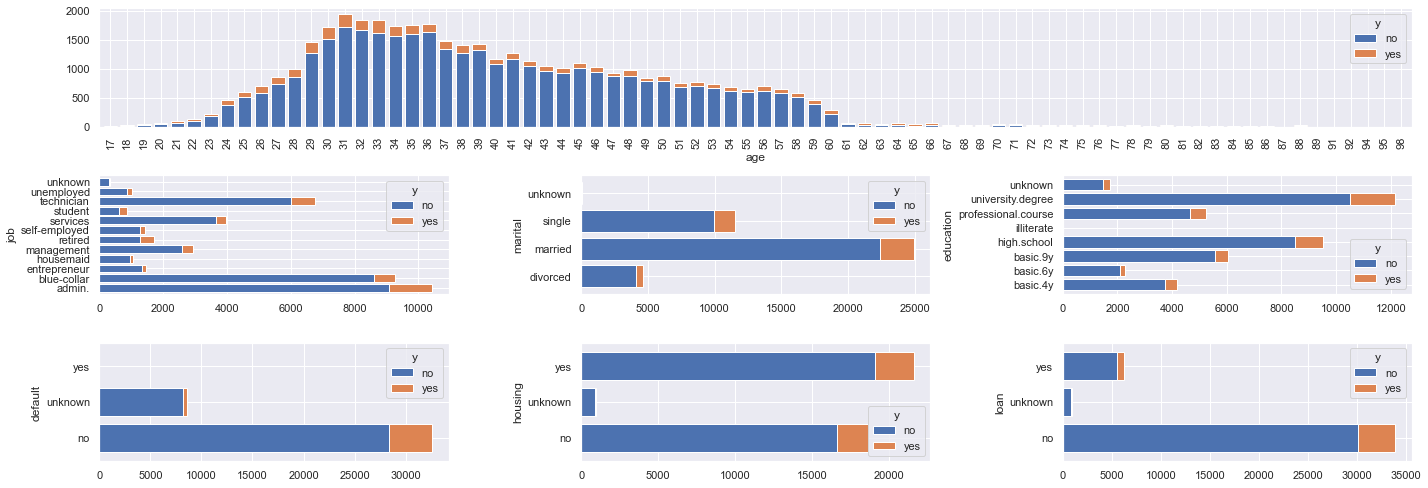

In [7]:
f = plt.figure(figsize=(20,9))
gs = f.add_gridspec(4, 3)

#age
df.groupby(['age', 'y']).size().reset_index().pivot(columns='y', index='age', values=0).plot(kind='bar', stacked=True, ax=f.add_subplot(gs[0,0:]), width = 0.8)

#job
df.groupby(['job', 'y']).size().reset_index().pivot(columns='y', index='job', values=0).plot(kind='barh', stacked=True, ax=f.add_subplot(gs[1, 0]), width = 0.8)

#marital
df.groupby(['marital', 'y']).size().reset_index().pivot(columns='y', index='marital', values=0).plot(kind='barh', stacked=True, ax=f.add_subplot(gs[1, 1]), width = 0.8)

#education
df.groupby(['education', 'y']).size().reset_index().pivot(columns='y', index='education', values=0).plot(kind='barh', stacked=True, ax=f.add_subplot(gs[1, 2]), width = 0.8)

#default
df.groupby(['default', 'y']).size().reset_index().pivot(columns='y', index='default', values=0).plot(kind='barh', stacked=True, ax=f.add_subplot(gs[2, 0]), width = 0.8)

#housing
df.groupby(['housing', 'y']).size().reset_index().pivot(columns='y', index='housing', values=0).plot(kind='barh', stacked=True, ax=f.add_subplot(gs[2, 1]), width = 0.8)

#loan
df.groupby(['loan', 'y']).size().reset_index().pivot(columns='y', index='loan', values=0).plot(kind='barh', stacked=True, ax=f.add_subplot(gs[2, 2]), width = 0.8)

plt.tight_layout()

- Hedef değişkenine göre sütunun grafiği çizdirildi, ayrıca açıklayıcı değerler tablolaştırıldı. 17 ile 98 arasında yer alan yaş grubumuzda ortalama yaş 40 olarak görülmektedir. En sık rastlanan yaş 31 olan sütunda, 78 farklı değer yer almaktadır. Listenin üst kısmında %1.13'lük aşırı değerler yer almaktadır. En çok ikna olan grup olarak, orta yetişkinler yer alıyor, daha yaşlı kesimde ise ikna oranı düşük görünüyor.
- Kampanyaya katılan iş grupları incelendiğinde, yönetim pozisyonunda yer alan kitlenin en fazla olumlu yanıt verdiği görülmektedir. Müşteri portföyüne bakıldığında yönetim, mavi yaka ve teknik meslek sahiplerinin yoğunluğu görülmektedir.
- Evli müşteriler kampanyaya daha sıcak bakma eğilimindedir.
- Min. lise mezunu kitle, diğer kesime oranla daha olumlu yaklaşmaktadır, üniversite mezunlarında bu oran daha fazladır. 
- Normal kredisi olmayan müşteriler daha fazla katılım sağlamışlardır. Ev kredisi müşterileri incelendiğinde, katılım bağıl görünmemektedir. Ayrıca kişisel kredisi olmayan müşterilerinde kampanyaya katılım eğilimde olduğu söylenebilir.


#### 3.2. Müşterinin Kampanyaya İlgisi

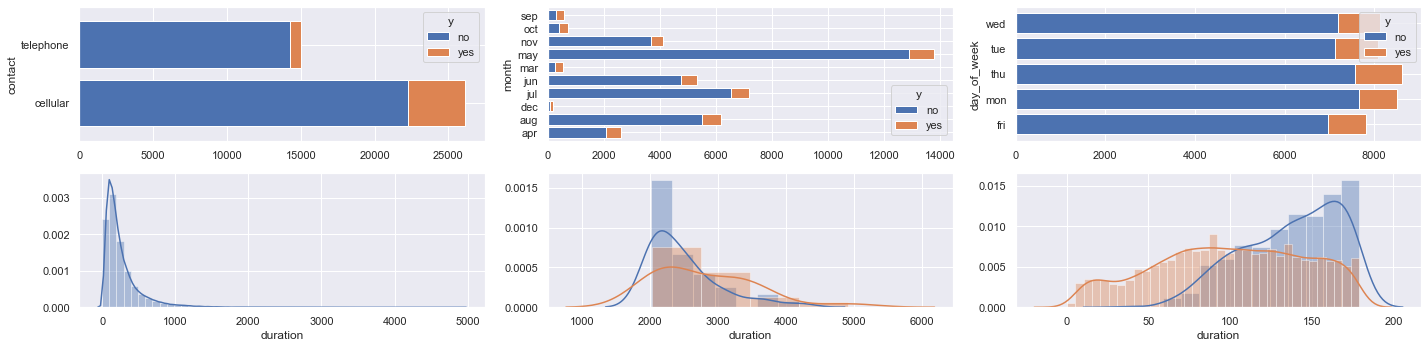

In [8]:
f = plt.figure(figsize=(20,5))
gs = f.add_gridspec(2, 3)

#contact
df.groupby(['contact', 'y']).size().reset_index().pivot(columns='y', index='contact', values=0).plot(kind='barh', stacked=True, ax=f.add_subplot(gs[0, 0]), width = 0.8)

#month
df.groupby(['month', 'y']).size().reset_index().pivot(columns='y', index='month', values=0).plot(kind='barh', stacked=True, ax=f.add_subplot(gs[0, 1]), width = 0.8)

#day_of_week
df.groupby(['day_of_week', 'y']).size().reset_index().pivot(columns='y', index='day_of_week', values=0).plot(kind='barh', stacked=True, ax=f.add_subplot(gs[0, 2]), width = 0.8)

#duration
sns.distplot(df.duration, ax=f.add_subplot(gs[1,0]))
sns.distplot(df[(df.duration > 2000) & (df.y == 'yes')].duration, ax=f.add_subplot(gs[1,1]))
sns.distplot(df[(df.duration > 2000) & (df.y == 'no')].duration, ax=f.add_subplot(gs[1,1]))
sns.distplot(df[(df.duration < 180) & (df.y == 'yes')].duration, ax=f.add_subplot(gs[1,2]))
sns.distplot(df[(df.duration < 180) & (df.y == 'no')].duration, ax=f.add_subplot(gs[1,2]))

plt.tight_layout()

- Mobil telefon üzerinden ulaşılan müşteriler kampanyaya daha sıcak baktıkları söylenebilir. 
- Yaz aylarında daha fazla müşteriye ulaşıldığı söylenebilir. Mayıs ayında, kampanyaya katılan müşteri sayısı diğer aylara göre en fazladır.
- Müşterilere haftaiçi iletişim kurulmaktadır. Bu sayı cuma günü daha azdır. Gün bazlı kampanyaya katılım oranının yaklaşık aynı olduğu söylenebilir.
- Hedef kitle ile konuşulan süreyi saniye türünden göstermektedir. Görüşmeler küçük saniyelerde daha yoğun görülüyor, kitlenin teklifle ilgilenmediği sonucu çıkarılabilir. Hedeflenen kitle telefonu açmadığında 0 olarak veri girilmişitir, ayrıca verisetini düşününce oldukça küçük bir kesim ile 82dk bulan uzun konuşmalar yapılmştır. * Alt ve üst limitlerin yer aldığı grafiklerde hedef kitleler bağımsızdır.
- Duration verisi arama yapılmadan önce bilinmemektedir, çağrı bitiminde hedef açıkça bilinir. 0 değerinin sonucu olarak hedef konuşma yapılmadan bilinmektedir. Dolayısıyla çıktıyı büyük oranda etkilemektedir. Bu özellik modele dahil edilmeyecektir.

#### 3.3. Diğer Özellikler

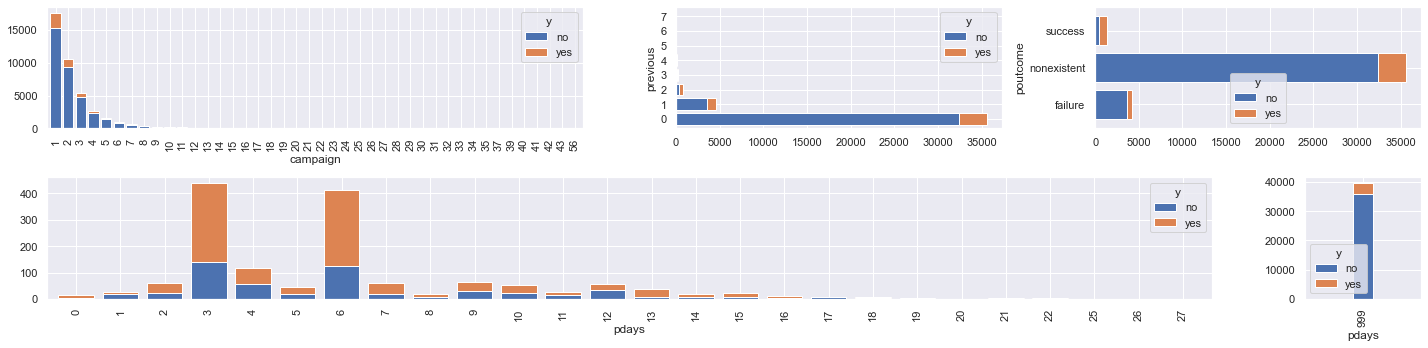

In [9]:
f = plt.figure(figsize=(20,5))
gs = f.add_gridspec(2, 7)

#campaign
df.groupby(['campaign', 'y']).size().reset_index().pivot(columns='y', index='campaign', values=0).plot(kind='bar', stacked=True, ax=f.add_subplot(gs[0, 0:3]), width = 0.8)

#pdays
df[(df.pdays < 30)].groupby(['pdays', 'y']).size().reset_index().pivot(columns='y', index='pdays', values=0).plot(kind='bar', stacked=True, ax=f.add_subplot(gs[1, :-1]), width = 0.8)
df[(df.pdays == 999)].groupby(['pdays', 'y']).size().reset_index().pivot(columns='y', index='pdays', values=0).plot(kind='bar', stacked=True, ax=f.add_subplot(gs[1, -1]), width = 0.1)

#previous
df.groupby(['previous', 'y']).size().reset_index().pivot(columns='y', index='previous', values=0).plot(kind='barh', stacked=True, ax=f.add_subplot(gs[0, 3:5]), width = 0.8)

#poutcome
df.groupby(['poutcome', 'y']).size().reset_index().pivot(columns='y', index='poutcome', values=0).plot(kind='barh', stacked=True, ax=f.add_subplot(gs[0, 5:7]), width = 0.8)

plt.tight_layout()

- Kampanya boyunca kaç defa görüşüldüğünü temsil eder, son görüşme dahildir. En fazla 56 defa görüşme yapılan kampanya için ortalama 2-3 defa görüşme yapıldığı anlaşılmaktadır. Ayrıca üst aykırı değerler (%5.84) bulunmaktadır.

- Kampanaya için azınlık müşteri (%12) ile görüşüldüğü söylenebilir. Katılımların çoğunluğu yeni görüşmelerden gelmiştir.

- Önceki kampanyaya katılan müşteriler daha fazla sıcak baklıkları söylenebilir. Ama bu kampanya yeni kitleleri hedef aldığı için önceki kampanya için bilgi bulunmadığı görülmektedir.

- Önceki kampanya görüşmesinden sonra kaç gün geçtiğini göstermektedir, daha önce irtibat kurulmadıysa 999 olarak veri girilmiştir. Verinin yaklaşık %97'sinde 999 olarak giriş bulunmaktadır. Geçmiş kampanya görüşmeleri dikkate alındığında, ilk 7 gün içinde geri dönüş yapılırsa daha olumlu sonuç alınmaktadır. Ayırca üst aykırı değerler (%3.67) bulunmaktadır.

#### 3.4. Sosyal ve Ekonomik Durum

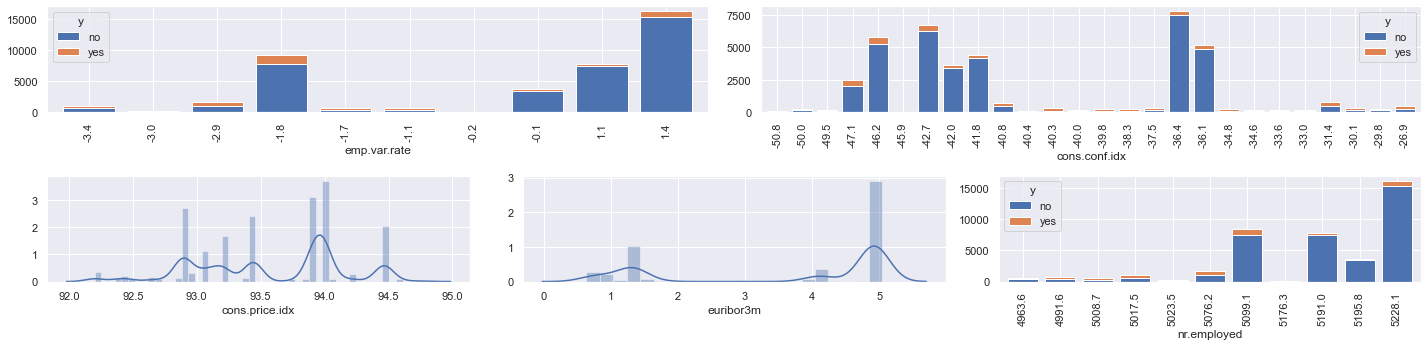

In [10]:
f = plt.figure(figsize=(20,5))
gs = f.add_gridspec(2, 6)

#emp.var.rate
df.groupby(['emp.var.rate', 'y']).size().reset_index().pivot(columns='y', index='emp.var.rate', values=0).plot(kind='bar', stacked=True, ax=f.add_subplot(gs[0, 0:3]), width = 0.8)

#cons.price.idx
sns.distplot(df['cons.price.idx'], ax=f.add_subplot(gs[1, 0:2]))

#cons.conf.idx
df.groupby(['cons.conf.idx', 'y']).size().reset_index().pivot(columns='y', index='cons.conf.idx', values=0).plot(kind='bar', stacked=True, ax=f.add_subplot(gs[0, 3:6]), width = 0.8)

#euribor3m
sns.distplot(df.euribor3m, ax=f.add_subplot(gs[1, 2:4]))

#nr.employed
df.groupby(['nr.employed', 'y']).size().reset_index().pivot(columns='y', index='nr.employed', values=0).plot(kind='bar', stacked=True, ax=f.add_subplot(gs[1, 4:6]), width = 0.8)

plt.tight_layout()

- Müşterilerin ekonomik ve sosyal durumlarına göre hedef bazlı özellikleri grafikleştirildi.

#### 3.5. Bilinmeyen Değerler (unknown)

Veri setinde çeşitli değişkenler altında 'unknown' değerler bulunuyor. Bu verilerin çıkarılması yerine modelin daha doğru tahminde bulunması için doldurulması tercih edildi. Bilinmeyen değerler, müşterilerin kişisel bilgilerinin olduğu 'job', 'marital', 'education', 'deafult', 'housing' ve 'loan' sütunlarında gözlemlendi. Bazı sütunlar için 'unknown' değeri, nan yerine gerçek bir veri olabilir, müşteri bu bilgiyi vermek istemediği düşünülebilir. 'marital' değerini müşterinin vermediği düşünülülerek, diğer 5 sütun değerleri doldurulmaya çalışıldı.
Eğitimin iş hayatını etkileyeceğini düşünerek, 'job' ve 'education' arasında ilişki sayesinde bilinmeyen değerler doldurulabilir. Ayrıca verinin toplandığı tarihte emeklilik yaşı göz önüne alınarak 'retired' değerleri işlenebilir.

In [11]:
dfCopy = df.copy()
dfCopy.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no


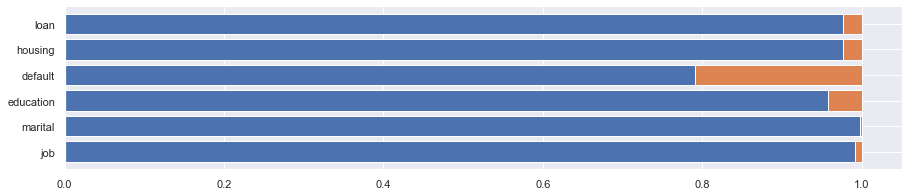

In [12]:
plt.figure(figsize=(15,3))
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan']:
    plt.barh(col, len(df[df[col] != 'unknown'])/len(df), color = '#4C72B0')
    plt.barh(col, len(df[df[col] == 'unknown'])/len(df), left = len(df[df[col] != 'unknown'])/len(df), color = '#DD8452')

In [13]:
pd.crosstab(dfCopy.education, dfCopy.job).style.background_gradient()

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education,,,,,,,,,,,,
basic.4y,77,2318,137,474,100,597,93,132,26,58,112,52
basic.6y,151,1426,71,77,85,75,25,226,13,87,34,22
basic.9y,499,3623,210,94,166,145,220,388,99,384,186,31
high.school,3329,878,234,174,298,276,118,2682,357,873,259,37
illiterate,1,8,2,1,0,3,3,0,0,0,0,0
professional.course,363,453,135,59,89,241,168,218,43,3320,142,12
university.degree,5753,94,610,139,2063,285,765,173,170,1809,262,45
unknown,249,454,57,42,123,98,29,150,167,212,19,131


In [14]:
dfCopy['job'][dfCopy['age'] >= 60].value_counts()

retired          785
admin.           106
housemaid         67
management        58
technician        49
blue-collar       43
unknown           29
self-employed     21
entrepreneur      17
unemployed        10
services           8
Name: job, dtype: int64

In [15]:
pd.crosstab(dfCopy.loan, dfCopy.job).style.background_gradient()

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
loan,,,,,,,,,,,,
no,8485,7648,1214,877,2414,1436,1186,3267,710,5607,838,268
unknown,227,240,36,29,71,44,40,101,23,147,27,5
yes,1710,1366,206,154,439,240,195,601,142,989,149,57


In [16]:
pd.crosstab(dfCopy.housing, dfCopy.job).style.background_gradient()

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
housing,,,,,,,,,,,,
no,4636,4304,641,491,1363,784,641,1818,381,2980,430,153
unknown,227,240,36,29,71,44,40,101,23,147,27,5
yes,5559,4710,779,540,1490,892,740,2050,471,3616,557,172


### 3. Veri Temizlenmesi

In [17]:
def dfQuantile(df, col):
    q1, q2, q3 = df[col].quantile(0.25), df[col].quantile(0.50), df[col].quantile(0.75)
    df.loc[(df[col] <= q1), col] = 0
    df.loc[(df[col] > q1) & (df[col] <= q2), col] = 1
    df.loc[(df[col] > q2) & (df[col] <= q3), col] = 2
    df.loc[(df[col] > q3), col] = 3
    return df

from scipy.stats.mstats import winsorize
def dfWinsorize(df, col):
    Q1=df[col].quantile(q=0.25)
    Q3=df[col].quantile(q=0.75)
    lowOutliers=Q1-1.5*(Q3-Q1)
    upperOutliers=Q3+1.5*(Q3-Q1)
    upout = (df[df[col]>upperOutliers][col].count()*100/len(df))
    lowout = (df[df[col]<lowOutliers][col].count()*100/len(df))
    if (upout != 0) | (lowout != 0):
        df[col] = winsorize(df[col], ((lowout / 100) + 1e-5, (upout / 100) + 1e-5)) #alt-üst
    return df

def splitbyJob(df, col):
    crossTab = pd.crosstab(df['job'], df[col])
    jobs = df.job.unique()
    for job in jobs:
        idx = df.loc[(df[col] == 'unknown') & (df['job'] == job)].index
        mask = np.random.rand(len(idx)) < ((crossTab.loc[job]['no']) / (crossTab.loc[job]['no'] + crossTab.loc[job]['yes']))
        idx_no, idx_yes = idx[mask], idx[~mask]
        df.loc[idx_no, col], df.loc[idx_yes, col] = 'no' , 'yes'
    return df

In [18]:
dfCopy = df.copy()

In [19]:
#unknown values
dfCopy.loc[(dfCopy['job'] == 'unknown') & (dfCopy['education'] == 'basic.4y'), 'job'] = 'blue-collar'
dfCopy.loc[(dfCopy['job'] == 'unknown') & (dfCopy['education'] == 'basic.6y'), 'job'] = 'blue-collar'
dfCopy.loc[(dfCopy['job'] == 'unknown') & (dfCopy['education'] == 'basic.9y'), 'job'] = 'blue-collar'
dfCopy.loc[(dfCopy['job'] == 'unknown') & (dfCopy['education'] == 'professional.course'), 'job'] = 'technician'
dfCopy.loc[(dfCopy['education'] == 'unknown') & (dfCopy['job'] == 'management'), 'education'] = 'university.degree'
dfCopy.loc[(dfCopy['education'] == 'unknown') & (dfCopy['job'] == 'services'), 'education'] = 'high.school'
dfCopy.loc[(dfCopy['education'] == 'unknown') & (dfCopy['job'] == 'housemaid'), 'education'] = 'basic.4y'
dfCopy.loc[(dfCopy['age'] >= 60) & (dfCopy['job'] == 'unknown'), 'job'] = 'retired'

#drop rows & columns
dfCopy = dfCopy.drop(dfCopy[dfCopy['marital'] == 'unknown'].index, axis=0)
dfCopy = dfCopy.drop(dfCopy[dfCopy['education'] == 'unknown'].index, axis=0)
dfCopy = dfCopy.drop(dfCopy[dfCopy['education'] == 'illiterate'].index, axis=0)
dfCopy = dfCopy.drop(dfCopy[dfCopy['job'] == 'unknown'].index, axis=0)
dfCopy = dfCopy.drop(['default'], axis=1)
dfCopy = dfCopy.drop(['duration'], axis=1)

#split by job
dfCopy = splitbyJob(dfCopy, 'loan')
dfCopy = splitbyJob(dfCopy, 'housing')

#winsorize
dfCopy = dfWinsorize(dfCopy, 'age')
dfCopy = dfWinsorize(dfCopy, 'campaign')

#pdays
dfCopy.loc[(dfCopy['pdays'] >= 0) & (dfCopy['pdays'] <= 10), 'pdays'] = 1
dfCopy.loc[(dfCopy['pdays'] > 10) & (dfCopy['pdays'] <= 20), 'pdays'] = 2
dfCopy.loc[(dfCopy['pdays'] > 20) & (dfCopy['pdays'] != 999), 'pdays'] = 3 
dfCopy.loc[(dfCopy['pdays'] == 999), 'pdays'] = 0   ##order

#round
dfCopy['euribor3m'] = dfCopy['euribor3m'].round()
dfCopy['cons.price.idx'] = dfCopy['cons.price.idx'].round(1)
dfCopy['cons.conf.idx'] = dfCopy['cons.conf.idx'].round()

#replace
dfCopy.job.replace('entrepreneur', 'self-employed', inplace = True)
dfCopy.job.replace('admin.', 'management', inplace = True)
dfCopy.job.replace('technician', 'blue-collar', inplace = True)
dfCopy.job.replace('housemaid', 'services', inplace = True)
dfCopy.marital.replace('divorced', 'single', inplace = True)
dfCopy.education.replace(['basic.9y', 'basic.6y', 'basic.4y'], 'basic.school', inplace = True)

#new customer
dfCopy.insert(6, 'customer', 'yes')
dfCopy.loc[(dfCopy['previous'] == 0), 'customer'] = 'no'
dfCopy.loc[(dfCopy['customer'] == 1), 'customer'] = 'yes'

#age
dfCopy.loc[(dfCopy['age'] < 30), 'age'] = 1
dfCopy.loc[(dfCopy['age'] >= 30) & (dfCopy['age'] < 40), 'age'] = 2
dfCopy.loc[(dfCopy['age'] >= 40) & (dfCopy['age'] < 50), 'age'] = 3
dfCopy.loc[(dfCopy['age'] >= 50) & (dfCopy['age'] < 60), 'age'] = 4
dfCopy.loc[(dfCopy['age'] >= 60) , 'age'] = 5

- çapraz tablolardan elde edilen değerler gözetlilerek, job ve education sütunlarındaki bilinmeyen değerler dolduruldu.
- 60 yaş eşik değer alınarak, retired değerler girildi. Age-Job dağılımı göz önüne alındı.
- job, education ve marital özelliklerinde yer alan unknown değerler dop edildi.
- education -> illiterate girdileri oldukça az olduğu için drop edildi.
- default sütununda yanlı değerler fazla olduğu için bırakıldı.
- duration özelliğinde yer alan 0 girdileri sonuçları direkt etkilediğinden, bırakıldı.
- loan ve housing için unknown değerler oranlı paylaştırıldı.
- campaign ve age özellikleri winsorize edildi.
- veriyi küçültmek için age ve pdays sütunları sınıflandırıldı.
- previous özelliği baz alınarak, yeni müşteri sütunu eklendi.
- meslek grupları küçültüldü.
- bazı ekonomik değerler yuvarlandı.

### 4. Temel Bileşen Analizi (PCA)

In [20]:
dfCopy.corr().style.background_gradient()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.005213,0.019661,0.013703,0.019187,0.003578,0.122874,0.039848,0.007740
campaign,0.005213,1.000000,-0.055166,-0.081301,0.147491,0.111655,-0.019163,0.126274,0.140451
pdays,0.019661,-0.055166,1.000000,0.547264,-0.252457,-0.067179,0.071437,-0.255418,-0.351711
previous,0.013703,-0.081301,0.547264,1.000000,-0.419859,-0.202858,-0.056074,-0.436230,-0.496397
emp.var.rate,0.019187,0.147491,-0.252457,-0.419859,1.000000,0.759137,0.198120,0.968680,0.907914
cons.price.idx,0.003578,0.111655,-0.067179,-0.202858,0.759137,1.000000,0.039963,0.689490,0.511148
cons.conf.idx,0.122874,-0.019163,0.071437,-0.056074,0.198120,0.039963,1.000000,0.338622,0.102873
euribor3m,0.039848,0.126274,-0.255418,-0.436230,0.968680,0.689490,0.338622,1.000000,0.920727
nr.employed,0.007740,0.140451,-0.351711,-0.496397,0.907914,0.511148,0.102873,0.920727,1.000000


In [21]:
from scipy.stats import chi2_contingency
def chi2value(df):
    dfObject = df.select_dtypes(include=['object'])
    dfChi = pd.DataFrame()
    for idx in dfObject.columns:
        for col in dfObject.columns:
            chi2, p, dof, ex = chi2_contingency(pd.crosstab(dfObject[idx], dfObject[col]))
            dfChi.loc[idx, col] = p
    return dfChi
chi2value(dfCopy).style.background_gradient()

,job,marital,education,housing,loan,customer,contact,month,day_of_week,poutcome,y
job,0.000000,0.000000,0.000000,0.243471,0.004292,0.000000,0.000000,0.000000,0.008136,0.000000,0.000000
marital,0.000000,0.000000,0.000000,0.015830,0.859900,0.000000,0.000000,0.000000,0.227365,0.000000,0.000000
education,0.000000,0.000000,0.000000,0.000384,0.081124,0.000000,0.000000,0.000000,0.000007,0.000000,0.000000
housing,0.243471,0.015830,0.000384,0.000000,0.000000,0.000001,0.000000,0.000000,0.000250,0.000004,0.023772
loan,0.004292,0.859900,0.081124,0.000000,0.000000,0.595069,0.064360,0.028082,0.103505,0.829298,0.294570
customer,0.000000,0.000000,0.000000,0.000001,0.595069,0.000000,0.000000,0.000000,0.178621,0.000000,0.000000
contact,0.000000,0.000000,0.000000,0.000000,0.064360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month,0.000000,0.000000,0.000000,0.000000,0.028082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
day_of_week,0.008136,0.227365,0.000007,0.000250,0.103505,0.178621,0.000000,0.000000,0.000000,0.001787,0.000040
poutcome,0.000000,0.000000,0.000000,0.000004,0.829298,0.000000,0.000000,0.000000,0.001787,0.000000,0.000000


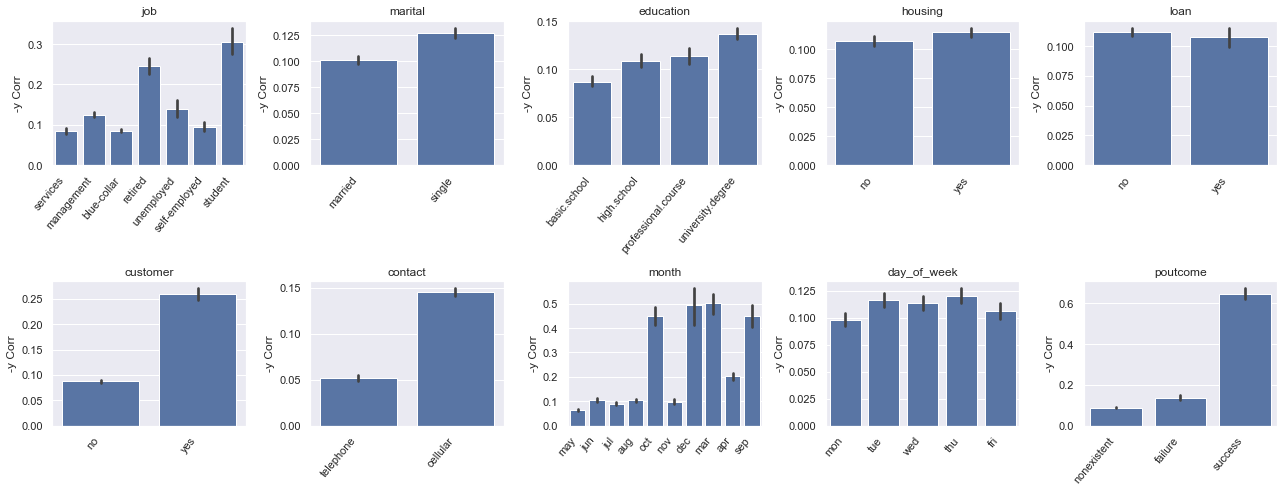

In [22]:
plt.figure(figsize=(18, 7))
for i, column in enumerate(dfCopy.select_dtypes(include=['object']).columns[:-1], 1):
    plt.subplot(2, 5, i)
    sns.barplot(x=column, y=dfCopy["y"].astype('category').cat.codes, data=dfCopy, color = '#4C72B0')
    plt.xticks(rotation=50, ha='right')
    plt.ylabel('-y Corr')
    plt.xlabel('')
    plt.title(f'{column}')
    plt.tight_layout()

- ekonomik değerler arasında yoğun ilişki bulunmaktadır.
- meslek ve evlilik durumu müşterinin kredi kullanmasında etkili olduğu görülmektedir.
- kişisel kredi olan müşteriler kampanyaya daha sıcak bakmaktalar.

> Ekonomik girdilerin yoğun ilişkisinden dolayı PCA grafikleri incelendi.

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [24]:
dfPCA = dfCopy.copy()

In [25]:
pcaSample = dfPCA[['emp.var.rate','euribor3m','nr.employed', 'cons.price.idx']]

pca = PCA(n_components = 4)
pca_scaled = StandardScaler().fit_transform(pcaSample)

pca1 = pca.fit_transform(pca_scaled)
pca.explained_variance_ratio_

array([0.85039671, 0.13051975, 0.01314566, 0.00593789])

In [26]:
dfPCA = dfPCA.drop(['emp.var.rate','euribor3m','nr.employed', 'cons.price.idx'], axis=1)
dfPCA['eco.rate'] = pca1.T[0]

In [27]:
for col in dfPCA.columns:
    if (len(dfPCA[col].unique()) <= 100):
        print(f"{col} : {dfPCA[col].unique()}")
        print(70*"-")

age : [4 2 3 1 5]
----------------------------------------------------------------------
job : ['services' 'management' 'blue-collar' 'retired' 'unemployed'
 'self-employed' 'student']
----------------------------------------------------------------------
marital : ['married' 'single']
----------------------------------------------------------------------
education : ['basic.school' 'high.school' 'professional.course' 'university.degree']
----------------------------------------------------------------------
housing : ['no' 'yes']
----------------------------------------------------------------------
loan : ['no' 'yes']
----------------------------------------------------------------------
customer : ['no' 'yes']
----------------------------------------------------------------------
contact : ['telephone' 'cellular']
----------------------------------------------------------------------
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
------------------------------

### 5. Dummy 

In [28]:
dfc = dfCopy.copy()
dfp = dfPCA.copy()

In [29]:
dfDummy = pd.get_dummies(dfc)
dfDummy_pca = pd.get_dummies(dfp)

dfDummy = dfDummy.drop(['marital_single', 'housing_no', 'loan_no', 'customer_no', 'contact_telephone', 'y_no'], axis=1)
dfDummy_pca = dfDummy_pca.drop(['marital_single', 'housing_no', 'loan_no', 'customer_no', 'contact_telephone', 'y_no'], axis=1)

dfDummy.head(3)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_management,job_retired,job_self-employed,job_services,job_student,job_unemployed,marital_married,education_basic.school,education_high.school,education_professional.course,education_university.degree,housing_yes,loan_yes,customer_yes,contact_cellular,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,4,1,0,0,1.100,94.000,-36.000,5.000,5191.000,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,4,1,0,0,1.100,94.000,-36.000,5.000,5191.000,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,2,1,0,0,1.100,94.000,-36.000,5.000,5191.000,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


## 6. Model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, precision_recall_curve
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

In [31]:
dfd = dfDummy.copy()

In [45]:
def confMatrix(X, Y):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)
    
    standardscaler = StandardScaler()
    x_train = standardscaler.fit_transform(x_train)
    x_test = standardscaler.transform(x_test)
    
    logr = LogisticRegression(solver = 'liblinear', penalty = 'l2', C = 100).fit(x_train, y_train)

    y_pred = logr.predict(x_test)
    y_prob = logr.predict_proba(x_test)[:,1]
    
    dfMatrix = pd.concat([pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['pred_0', 'pred_1']), 
               pd.DataFrame(precision_recall_fscore_support(y_test, y_pred), index=['precision', 'recall', 'f1-score', 'support']).T],
               ignore_index=False, axis=1)
    print('Score (Accuracy):' ,  '%.5f' % logr.score(x_test, y_test))
    print('ROC AUC Score:   ' ,  '%.5f' % roc_auc_score (y_test, y_prob))
    return dfMatrix  

In [33]:
Y = dfd['y_yes']
X = dfd.drop(['y_yes'], axis=1)
confMatrix(X, Y)

Score (Accuracy): 0.90040
ROC AUC Score:    0.79580


,pred_0,pred_1,precision,recall,f1-score,support
0,6929,112,0.911,0.984,0.946,7041.000
1,677,204,0.646,0.232,0.341,881.000


> Hedef dengesiz dağıldığından dolayı model performası düşük sonuçlandı.

### 6.1. Parametreler

In [41]:
logr = LogisticRegression()
params = {'C': np.logspace(-4, 4, 9), 'penalty': ['l1', 'l2'], 'solver': ('lbfgs', 'liblinear')} 

In [42]:
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 42)
gridcv_results = GridSearchCV(estimator = logr, param_grid = params, cv = k_fold).fit(X, Y)

In [43]:
gridcv_results.best_params_

{'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [44]:
pd.set_option("display.float_format", "{:.5f}".format)
grid_cv = pd.DataFrame(gridcv_results.cv_results_)
grid_cv = grid_cv[['mean_fit_time','param_solver', 'param_penalty', 'param_C', 'mean_test_score']]
grid_cv = grid_cv.sort_values(by='mean_test_score', ascending = False)
grid_cv.head(5)

,mean_fit_time,param_solver,param_penalty,param_C,mean_test_score
27,0.24740,liblinear,l2,100.00000,0.90078
30,0.66762,lbfgs,l2,1000.00000,0.90032
26,0.55102,lbfgs,l2,100.00000,0.90027
14,0.64059,lbfgs,l2,0.10000,0.90025
13,60.25486,liblinear,l1,0.10000,0.90025


### 6.2. Sınıf Dengesizliği

In [46]:
#dfd.y_yes.value_counts()
len(dfd[dfd.y_yes == 1]) / len(dfd)

0.11126540092910524

In [47]:
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.utils import resample

In [48]:
x_smote, y_smote = SMOTE(random_state=42, sampling_strategy=1.0).fit_sample(X, Y)
confMatrix(x_smote, y_smote)

Score (Accuracy): 0.86230
ROC AUC Score:    0.92603


,pred_0,pred_1,precision,recall,f1-score,support
0,6583,458,0.81634,0.93495,0.87163,7041.00000
1,1481,5559,0.92388,0.78963,0.85150,7040.00000


In [49]:
x_adasyn, y_adasyn = ADASYN().fit_sample(X, Y)
confMatrix(x_adasyn, y_adasyn)

Score (Accuracy): 0.84705
ROC AUC Score:    0.91787


,pred_0,pred_1,precision,recall,f1-score,support
0,6534,506,0.79770,0.92812,0.85799,7040.00000
1,1657,5445,0.91497,0.76669,0.83429,7102.00000


In [50]:
df_other = dfd[dfd.y_yes == 0]
df_fraud = dfd[dfd.y_yes == 1]

reOther = resample(df_fraud, replace = True, n_samples = len(df_other), random_state = 111)
df_over = pd.concat([df_other, reOther])

reFraud = resample(df_other, replace = True, n_samples = len(df_fraud), random_state = 111)
df_under = pd.concat([df_fraud, reFraud])

In [51]:
Y = df_over['y_yes']
X = df_over.drop('y_yes', axis=1)
confMatrix(X, Y)

Score (Accuracy): 0.73972
ROC AUC Score:    0.79516


,pred_0,pred_1,precision,recall,f1-score,support
0,6071,970,0.69256,0.86224,0.76814,7041.00000
1,2695,4345,0.81750,0.61719,0.70336,7040.00000


In [52]:
Y = df_under['y_yes']
X = df_under.drop('y_yes', axis=1)
confMatrix(X, Y)

Score (Accuracy): 0.74022
ROC AUC Score:    0.79632


,pred_0,pred_1,precision,recall,f1-score,support
0,738,144,0.70152,0.83673,0.76319,882.00000
1,314,567,0.79747,0.64359,0.71231,881.00000


### 6.3. Model Grafikleri

In [53]:
def modelFrame(X, Y, idx):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)
    
    standardscaler = StandardScaler()
    x_train = standardscaler.fit_transform(x_train)
    x_test = standardscaler.transform(x_test)
    
    k_fold = KFold(n_splits = 5, shuffle = True, random_state = 42)
    model = LogisticRegression(solver = 'liblinear', penalty = 'l2', C = 100, n_jobs=-1).fit(x_train, y_train)

    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:,1]

    df = pd.Series({'accuracy': accuracy_score(y_test,y_pred),
                    'precision' :precision_score(y_test,y_pred),
                    'recall': recall_score(y_test,y_pred),
                    'f1-score': f1_score(y_test,y_pred),
                    'auc-roc': roc_auc_score(y_test, y_prob),
                    'cross-val': cross_val_score(estimator = LogisticRegression(solver = 'liblinear', penalty = 'l2', C = 0.01),
                                             X = X, y = Y, cv = k_fold).mean()}, name = idx)
    return df

def modelCurve(X, Y, leg):   
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)

    standardscaler = StandardScaler()
    x_train = standardscaler.fit_transform(x_train)
    x_test = standardscaler.transform(x_test)

    model = LogisticRegression(solver = 'liblinear', penalty = 'l2', C = 100, n_jobs=-1).fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:,1]

    plt.subplot(1, 2, 1)
    fpr, tpr, thresholds  = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label = leg + ' %.4f' % roc_auc_score (y_test, y_prob))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(precision, recall, label = leg)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Recall/Precision Curve')
    plt.legend()
    return

def modelCoef(X, Y): 
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)

    standardscaler = StandardScaler()
    x_train = standardscaler.fit_transform(x_train)
    x_test = standardscaler.transform(x_test)
    
    model = LogisticRegression(solver = 'liblinear', penalty = 'l2', C = 100, n_jobs=-1).fit(x_train, y_train)

    dfCoef = pd.DataFrame(model.coef_, columns = X.columns).T
    dfCoef.plot.bar(figsize=(15, 4), width=0.9)
    plt.ylabel('Coefficient')
    plt.legend('')
    return

In [54]:
dfd = dfDummy.copy()
dfp = dfDummy_pca.copy()

dfModel = pd.DataFrame(columns = ['cross-val', 'accuracy', 'precision', 'recall', 'f1-score', 'auc-roc'])

Y = dfd['y_yes']
X = dfd.drop(['y_yes'], axis=1)
dfModel = dfModel.append(modelFrame(X, Y, 'logistic'))

x_adasyn, y_adasyn = ADASYN().fit_sample(X, Y)
dfModel = dfModel.append(modelFrame(x_adasyn, y_adasyn, 'adasyn'))

x_smote, y_smote = SMOTE(random_state = 42).fit_sample(X, Y)
dfModel = dfModel.append(modelFrame(x_smote, y_smote, 'smote'))

Y = df_under['y_yes']
X = df_under.drop('y_yes', axis=1)
dfModel = dfModel.append(modelFrame(X, Y, 'undersampling'))

Y = df_over['y_yes']
X = df_over.drop('y_yes', axis=1)
dfModel = dfModel.append(modelFrame(X, Y, 'oversampling'))

Y = dfp['y_yes']
X = dfp.drop('y_yes', axis=1)
dfModel = dfModel.append(modelFrame(X, Y, 'pca_logistic'))

x_smote, y_smote = SMOTE(random_state = 42).fit_sample(X, Y)
dfModel = dfModel.append(modelFrame(x_smote, y_smote, 'pca_smote'))

In [55]:
dfModel.style.background_gradient()

,cross-val,accuracy,precision,recall,f1-score,auc-roc
logistic,0.898707,0.900404,0.644654,0.232690,0.341952,0.795892
adasyn,0.831591,0.847334,0.915169,0.767108,0.834623,0.918420
smote,0.844720,0.862297,0.923882,0.789631,0.851497,0.926031
undersampling,0.729977,0.740216,0.797468,0.643587,0.712312,0.796321
oversampling,0.738658,0.739720,0.817498,0.617188,0.703359,0.795164
pca_logistic,0.897192,0.896112,0.597973,0.200908,0.300765,0.787996
pca_smote,0.831610,0.861444,0.923871,0.787784,0.850418,0.926861


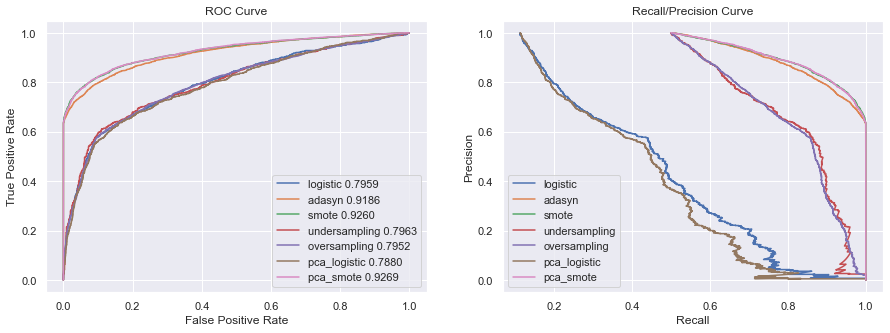

In [56]:
plt.figure(figsize=(15,5))

dfd = dfDummy.copy()
dfp = dfDummy_pca.copy()

Y = dfd['y_yes']
X = dfd.drop(['y_yes'], axis=1)
modelCurve(X, Y, 'logistic')

x_adasyn, y_adasyn = ADASYN().fit_sample(X, Y)
modelCurve(x_adasyn, y_adasyn, 'adasyn')

x_smote, y_smote = SMOTE(random_state = 42).fit_sample(X, Y)
modelCurve(x_smote, y_smote, 'smote')

Y = df_under['y_yes']
X = df_under.drop('y_yes', axis=1)
modelCurve(X, Y, 'undersampling')

Y = df_over['y_yes']
X = df_over.drop('y_yes', axis=1)
modelCurve(X, Y, 'oversampling')

Y = dfp['y_yes']
X = dfp.drop('y_yes', axis=1)
modelCurve(X, Y, 'pca_logistic')

x_smote, y_smote = SMOTE(random_state = 42).fit_sample(X, Y)
modelCurve(x_smote, y_smote, 'pca_smote')

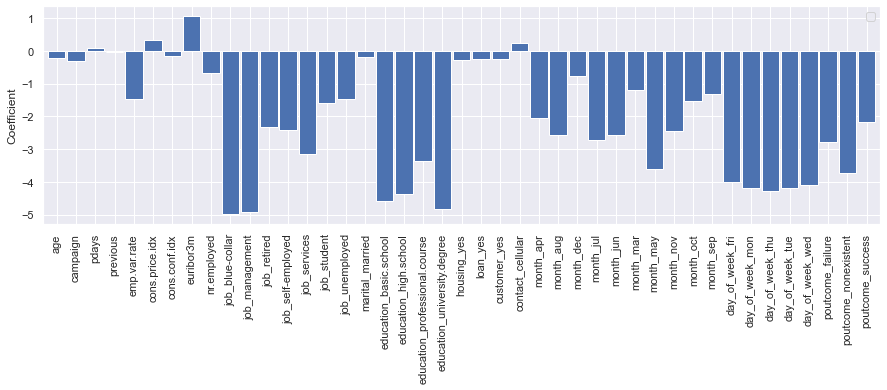

In [57]:
dfd = dfDummy.copy()
Y = dfd['y_yes']
X = dfd.drop(['y_yes'], axis=1)
x_smote, y_smote = SMOTE(random_state = 42).fit_sample(X, Y)
modelCoef(x_smote, y_smote)

## 7. Sonuç

Veri setinden iyi bir tahmin alarak, kampanya için hedef müşteri kitlesine odaklanılmak istenmektedir. En iyi tahmini alabilmek için alternatif modeller üzerinde lojistik regresyon denendi. Hedefin sınıf dengesizliğinden dolayı, __SMOTE__ yöntemi ile en iyi değerler alınmıştır. Ayrıca hiperparametreler üzerinde denemeler yapılarak en iyi sonuç hedeflenmiştir, GridCV üzrinde yapılan denemlerde en iyi sonuçlar __{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}__ hiperparametreleri için geçerli olmuştur. Verideki dengesizlikten dolayı 'Accuracy' yerine 'F1-Score' incelenmiştir. En uygun model üzerinde katsayılar incelendiğinde, kampanyaya sağlıklı bakanların sosyal ve ekonomik derecelendirmeleri en yüksek değerlere sahipler, ardından kredisi olan kitle geliyor. 'blue-collar' ve 'management' meslek grupları ve üniversite mezunları ise negatif olarak etkimektedir.